In [1]:
%matplotlib inline

# Show dataset heart disease

In [2]:
import pandas as pd
from ydata_profiling import ProfileReport

In [3]:
heartDisease = pd.read_csv('HeartDisease_Dataset/heart_statlog_cleveland_hungary_final.csv')
heartReport = ProfileReport(heartDisease, title="Heart report")
heartDisease.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
heartReport.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Clean dataset

In [5]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
heart = heartDisease.drop_duplicates().copy()
select_data = heart[['chest pain type','cholesterol','max heart rate','exercise angina','oldpeak','ST slope']]
pca = PCA(2)
pca_res = pca.fit_transform(select_data)

heart.loc[:, 'X'] = pca_res[:, 0]
heart.loc[:, 'Y'] = pca_res[:, 1]
heart.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target,X,Y
0,40,1,2,140,289,0,0,172,0,0.0,1,0,92.083239,29.947559
1,49,0,3,160,180,0,0,156,0,1.0,2,1,-17.659978,20.243341
2,37,1,2,130,283,0,1,98,0,0.0,1,0,81.820696,-43.570525
3,48,0,4,138,214,0,0,108,1,1.5,2,1,13.510744,-29.655437
4,54,1,3,150,195,0,0,122,0,0.0,1,0,-4.647910,-14.544913


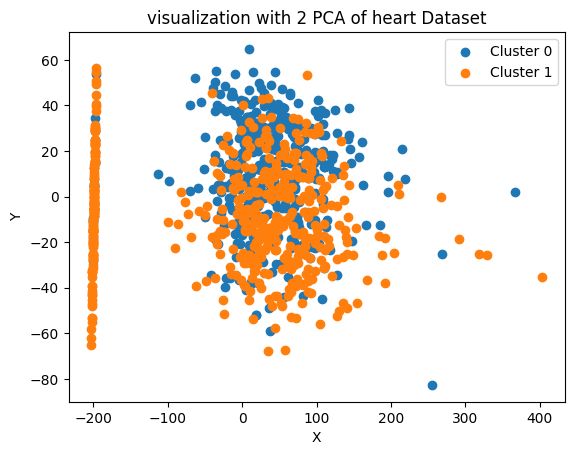

In [6]:
cluster_0 = heart[heart['target']==0]
cluster_1 = heart[heart['target']==1]

plt.scatter(cluster_0['X'], cluster_0['Y'], label ='Cluster 0')
plt.scatter(cluster_1['X'], cluster_1['Y'], label ='Cluster 1')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('visualization with 2 PCA of heart Dataset')
plt.show()

In [7]:
heart = heart.drop(['X','Y'],axis=1)
heart.to_csv('HeartDisease_Dataset/dataset_heartClean.csv', index=False)